# Galway Mayo Institute of Technology

| Header | Description |
| --- | --- |
| `Author` | Tomas O'Malley (G00361128)@gmit.ie |
| `Course` | Software Development GA_KSOAG_H08 Y4  |
| `Module` | Emerging Technologies   |
| `Program` | Wind turbine power Model |
| `Langauge` | Python |
| `Weighting` | 50% |
| `Year of Study` | 4 |


# Problem Sheet
In this project you must create a web service that uses machine learning to make pre- dictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.





# Research and Analysis

- Use of the libraries shown on tutorials via moodle 
    - keras Deep Learning in Python 
    - TensorFlow machine learning Library Python
    - matplotlib https://matplotlib.org/tutorials/introductory/pyplot.html
    - Reading a scv using the panda data frames library https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    - Flask templaet control  https://medium.com/analytics-vidhya/flask-how-create-a-responsive-navbar-146c7213df60






In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import  numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Plot Styling 
plt.style.use("ggplot")

# Plot sizing 
plt.rcParams['figure.figsize'] = [14,8]

In [3]:
# Read csv Dataset provided by Moodle Portal 
powerDataModel = pd.read_csv("powerproduction.csv")

In [4]:
# Build our model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [5]:
# prints/iterates  the metric values at the end of each epoch.
model.fit(powerDataModel['speed'], powerDataModel['power'], epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 1s 1ms/step - loss: 4009.9010
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 3441.4298
Epoch 3/50
50/50 [==============================] - 0s 1000us/step - loss: 3772.3325
Epoch 4/50
50/50 [==============================] - 0s 816us/step - loss: 3385.9360
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 2961.2957
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 2870.3076
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 2651.4390
Epoch 8/50
50/50 [==============================] - 0s 1000us/step - loss: 2403.6999
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 2381.8711
Epoch 10/50
50/50 [==============================] - 0s 939us/step - loss: 2273.2205
Epoch 11/50
50/50 [==============================] - 0s 1ms/step - loss: 2436.4881
Epoch 12/50
50/50 [==============================] - 0s 959us/step - loss: 1986.4109
E

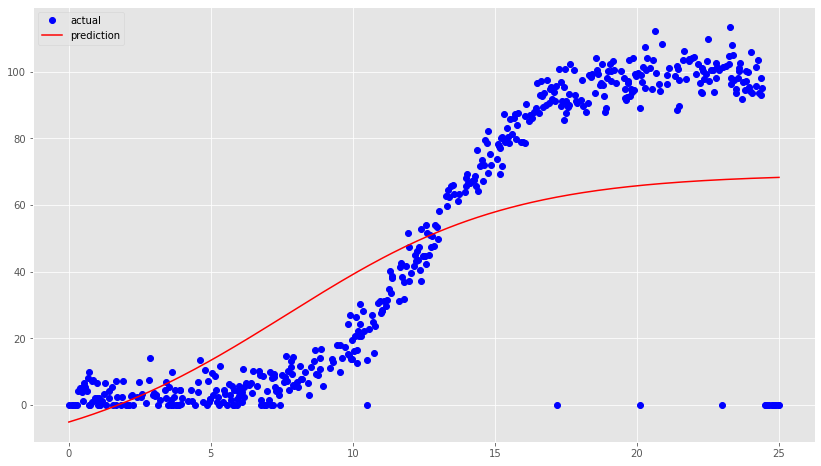

In [6]:
# plot neurel network from csv dataset speed and power 
plt.plot(powerDataModel['speed'], powerDataModel['power'], "bo", label='actual')
plt.plot(powerDataModel['speed'], model.predict(powerDataModel['speed']),'r', label='prediction')
plt.legend();


In [7]:
# Save the ouput of the model 
model.save("powerProduction.h5")


# User input
user = int(input("Enter val: "));
# Map user data  to model
powerDataModel['speed'] = user
powerDataModel['power'] = model.predict(powerDataModel['speed'])
prediction = powerDataModel['power'][0]
# print the prediction to console / html page 
print("Prediction Calc: ",prediction)


Enter val: 11
Prediction Calc:  43.9042


### END

# Reflection - How it Works


- To train my Model I began by importing all the libraries need to create the scatter plot and the neural network for manipulation. 





- Define the styling elements such as the plt sizing 
- Loaded in my Dataset of speed and power provided online via Moodle. I followed an online resource to successfully load the data stored in the CSV using the panda library documentation.[3]



- By reading the online documentation for Keras, Sequential provides training and inference features on this model.[4] Once the model I sed the compile method after researching the documentation online [5] compiling the speed and power attributes read from the CSV.




- The actual data is plotted in blue and the predicted value is displayed with a red linear line.


- Once displayed I saved the model using the model.save library which saves the neural network to a JSON model named powerProduction.h5 using the h5py library[6].


- Finally, the user can enter their value for speed by the user.

- In my repo, you can download and run the application using Flask [7]    
    


# References

[4][Create Sequential Model](https://keras.io/api/models/sequential/)
 
[3][_READ CSV](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

[5][compile model](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/)

[6][save model](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

[7][Github Repo](https://github.com/OmalleyTomas98/EmergingTechnologiesFinalYearProject.git)